In [1]:
from geotools import offset_distribution
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#path = './testfiles/nearoffset_dist/Eq_Arg/'
#filenames = {'Standard Triple Source - 12x75': path + '12x75mx6000m_TS.A1X',
#            'Wide Tow Source - Equinor - 12x75': path + '12x75mx8000m_Equinor.A1X'}

In [4]:
path = './testfiles/nearoffset_dist/Eq_Arg/'
filenames = {'Standard Triple Source - 12x93.75': path + '12x93,75mx6000m_MW.A1X',
            'Wide Tow Source - 12x93.75': path + '12x93,75mx6000m_WT_MW.A1X'}

In [5]:
my_offset_data = offset_distribution.OffsetData(filenames, minoffset=100, maxoffset=600, incoffset=100)

Reading configuration:  Standard Triple Source - 12x93.75
From file:  ./testfiles/nearoffset_dist/Eq_Arg/12x93,75mx6000m_MW.A1X
Reading configuration:  Wide Tow Source - 12x93.75
From file:  ./testfiles/nearoffset_dist/Eq_Arg/12x93,75mx6000m_WT_MW.A1X
Offsets limited to [100, 600]m
Input data MidPtX range is: 9984.375 to 11687.5
Computing offset components...
Done!
Bin size seems to be 15.625 for the configuration Standard Triple Source - 12x93.75.
Adding the following midpoints to Standard Triple Source - 12x93.75: 
No midpoints added.
Bin size seems to be 15.625 for the configuration Wide Tow Source - 12x93.75.
Adding the following midpoints to Wide Tow Source - 12x93.75: 
      MidPtX               Configuration
0  10000.000  Wide Tow Source - 12x93.75
1  11671.875  Wide Tow Source - 12x93.75
Generating 5 offset planes
Computing attribute statistics...
Computing for attribute AzSrc
Computing for attribute DipSrc
Computing for attribute Offset
Computing for attribute RefAngIn
Computi

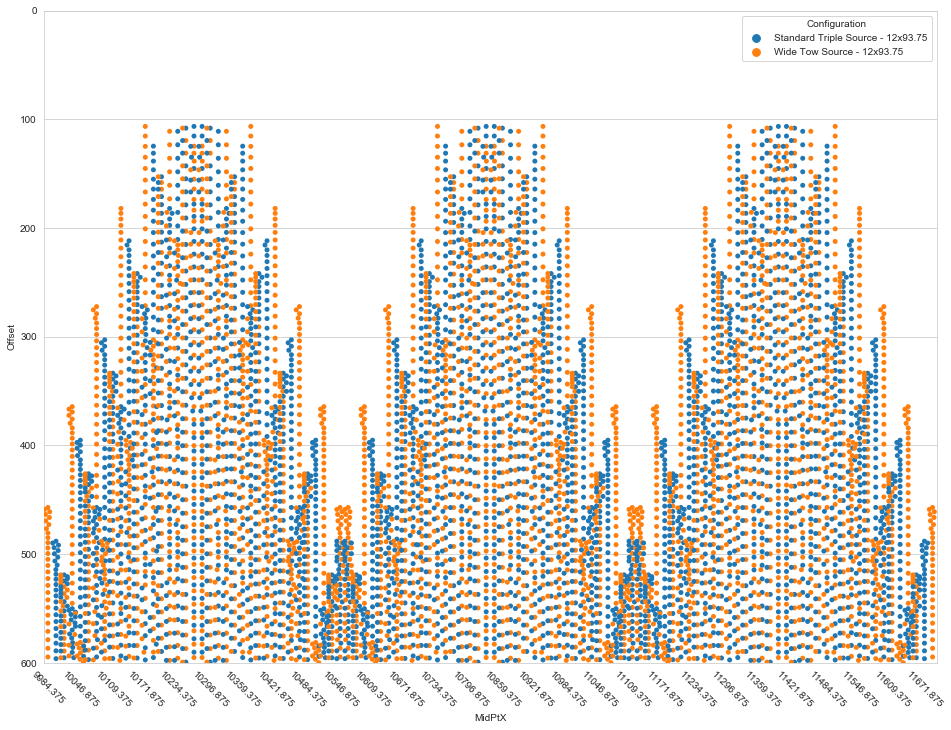

In [6]:
my_offset_data.plot_swarm()

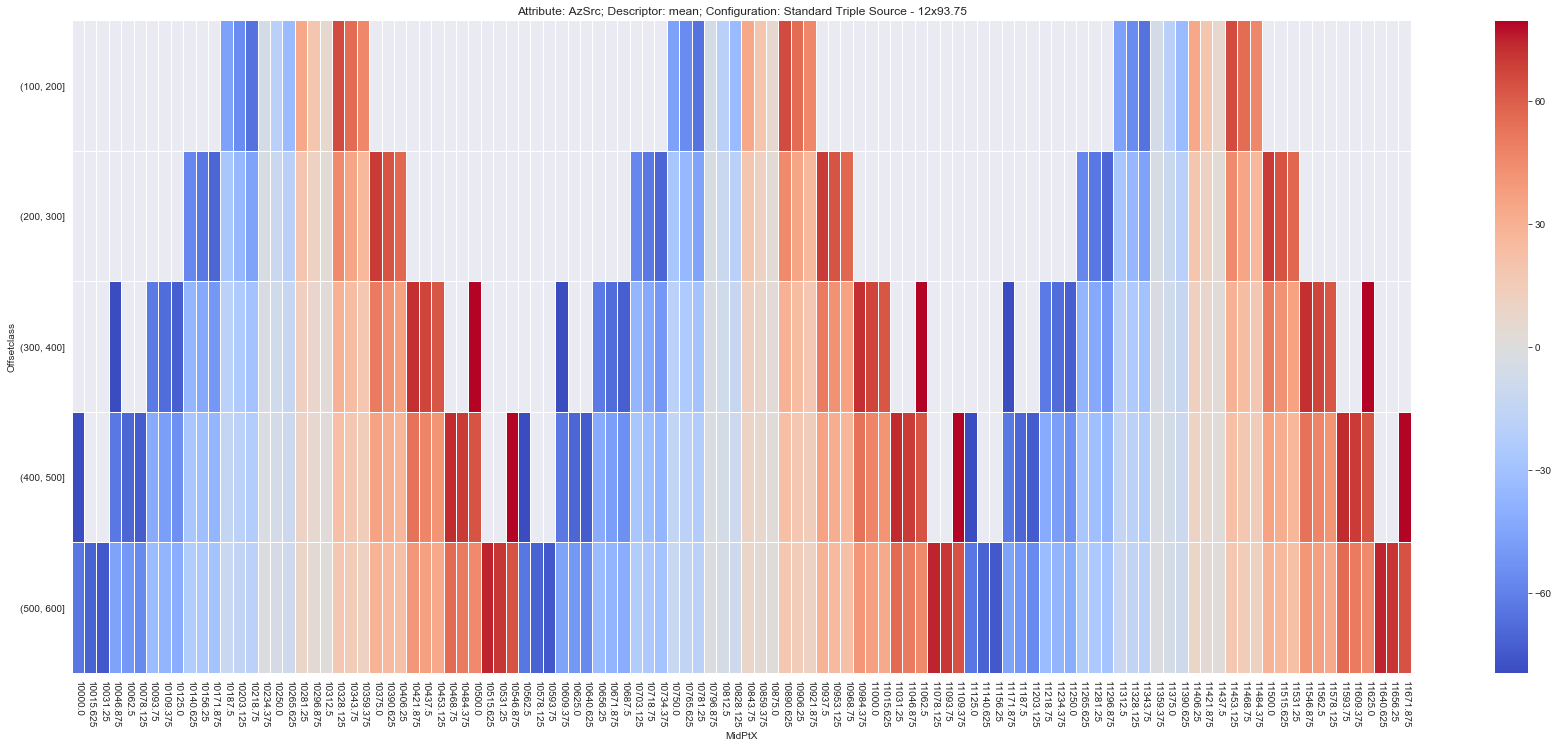

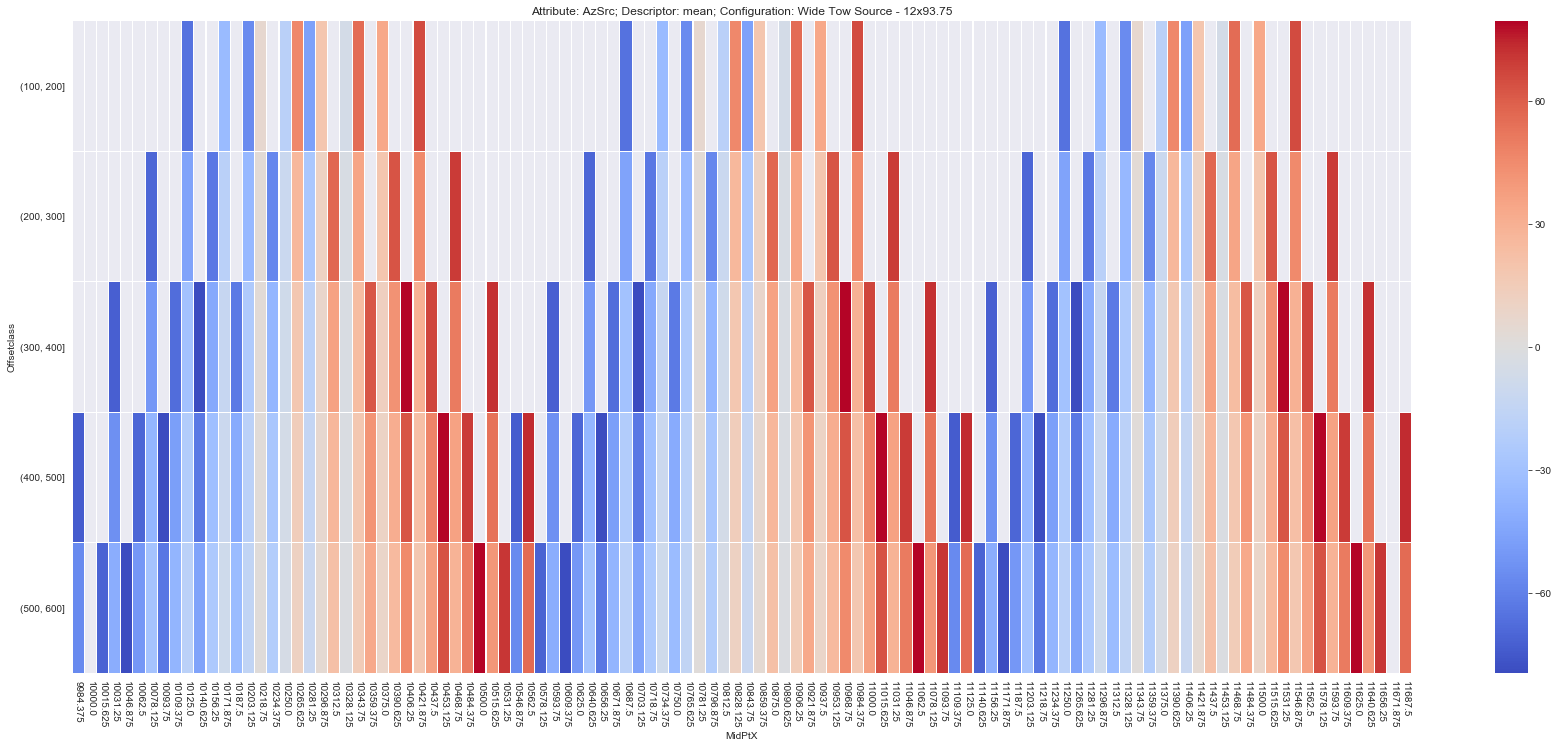

In [7]:
my_offset_data.plot_attrib(attrib='AzSrc', descriptor='mean', palette="coolwarm")

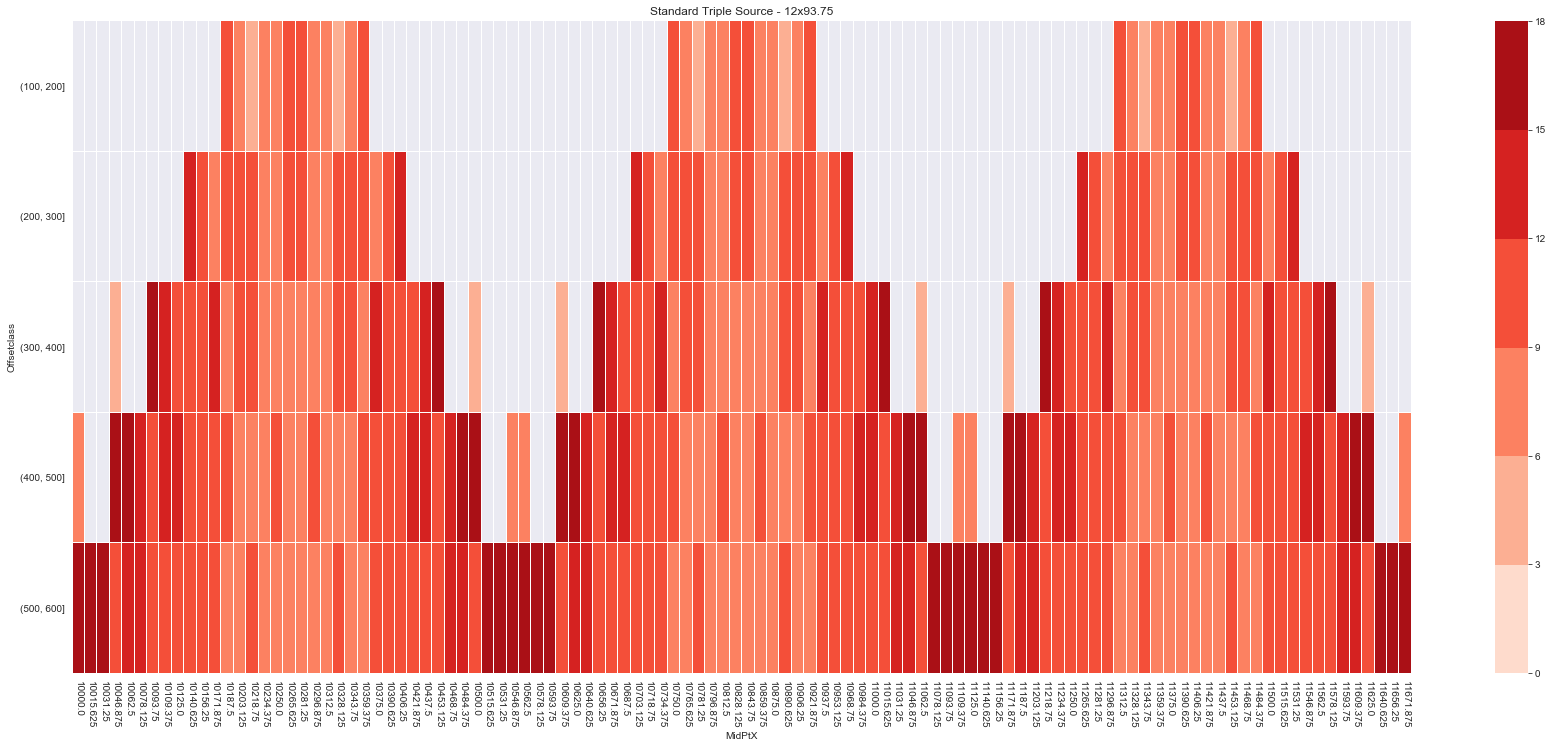

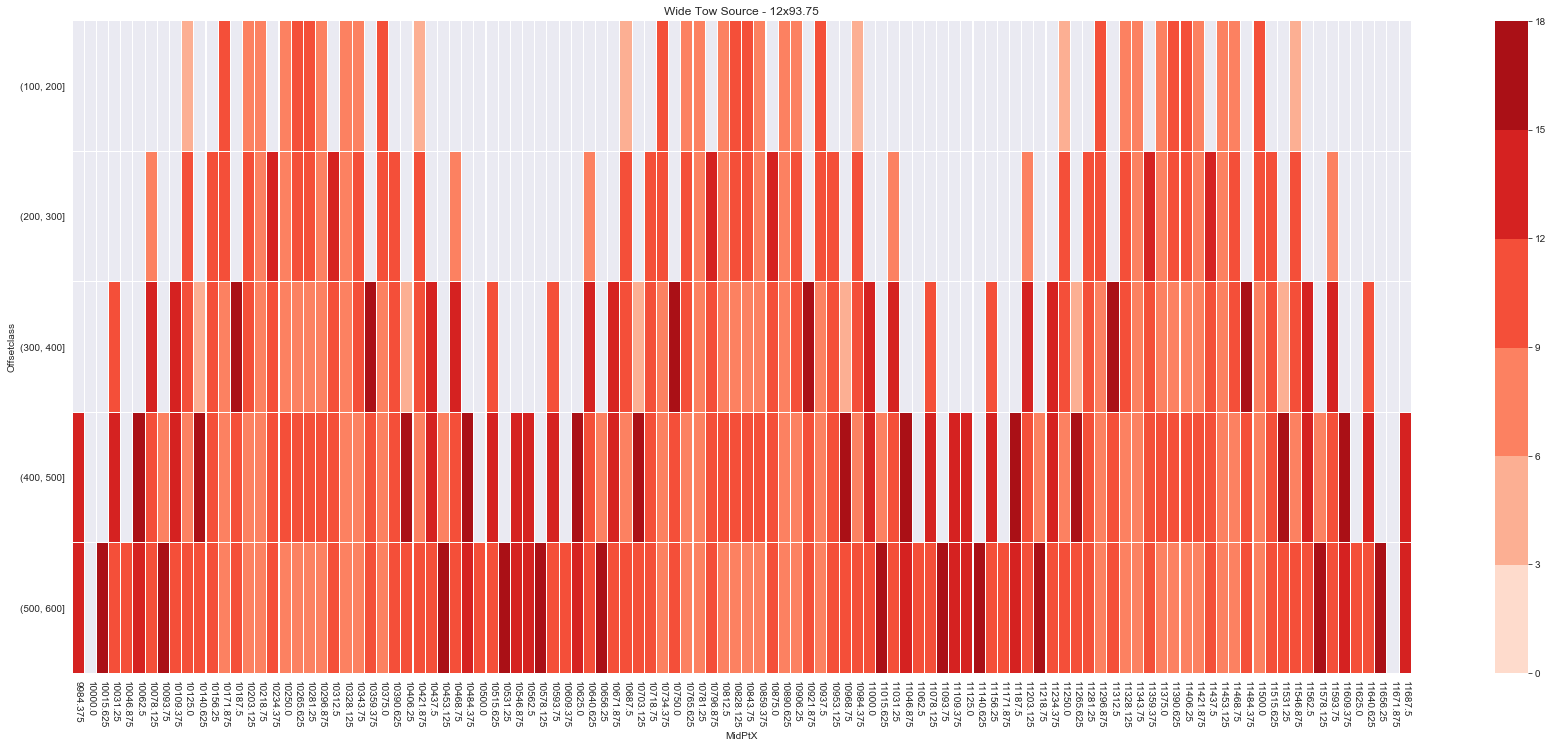

In [8]:
my_offset_data.plot_offset_bins(palette='Reds', maxfold=18)

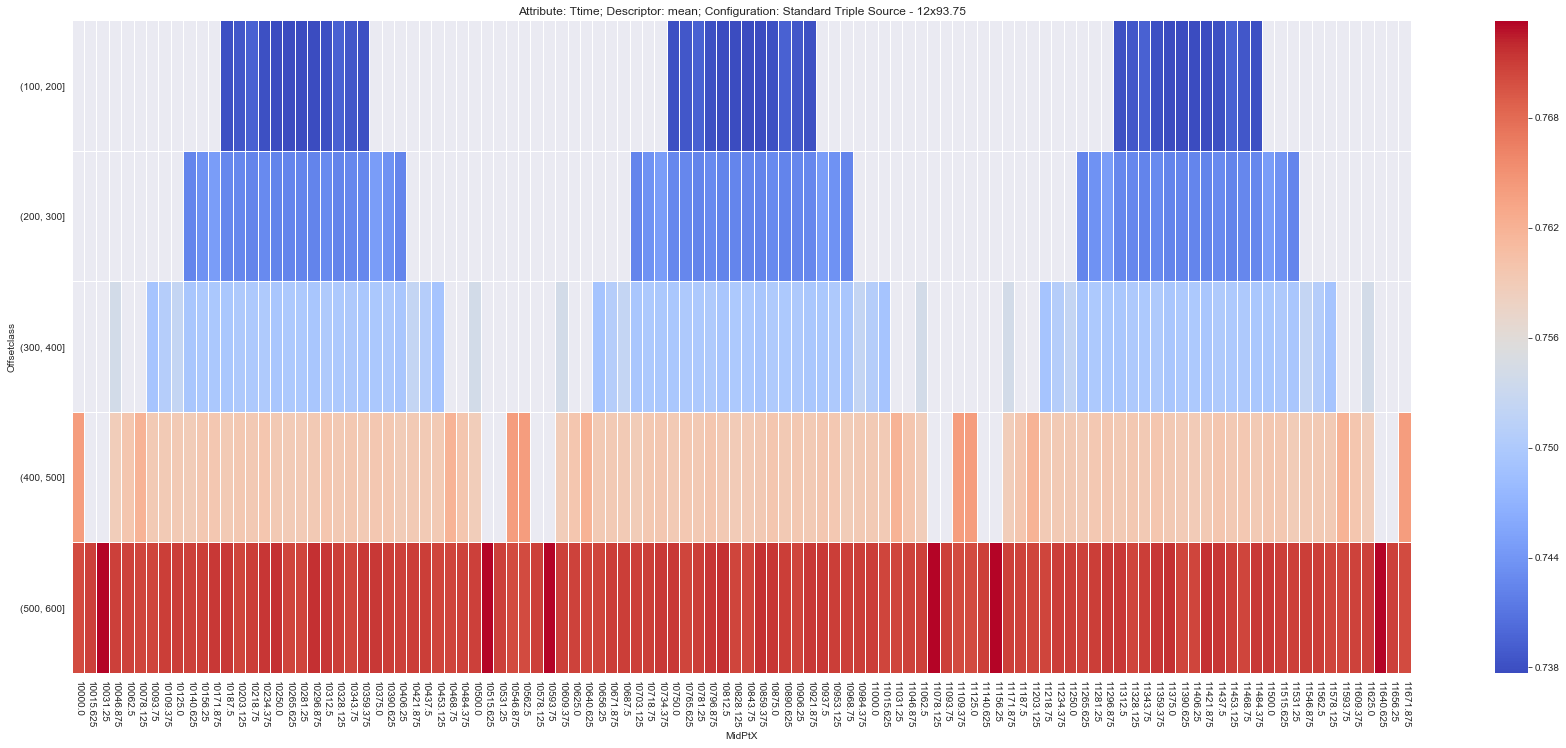

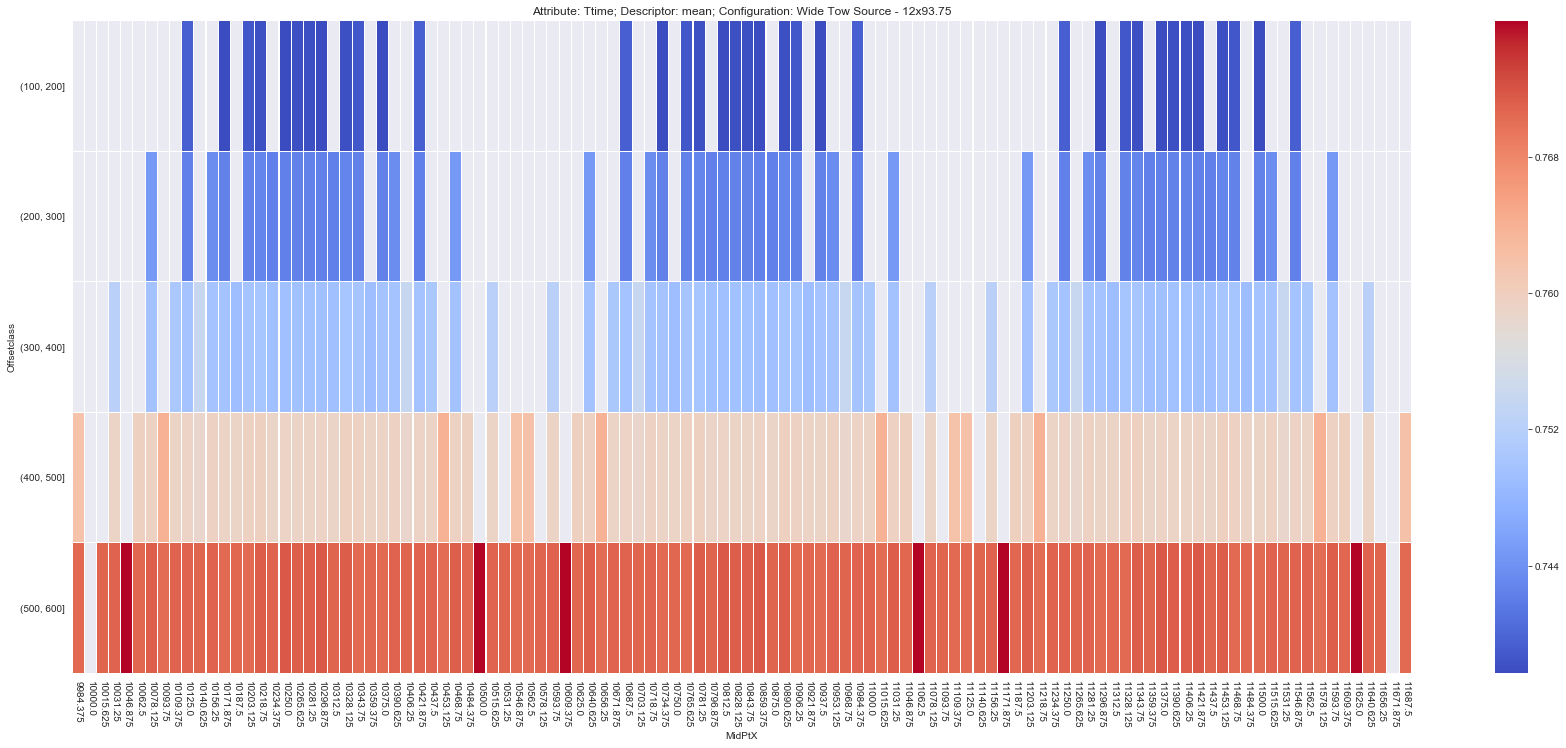

In [9]:
my_offset_data.plot_attrib(attrib='Ttime', descriptor='mean', palette="coolwarm")

In [10]:
#my_offset_data.offset_binned

In [11]:
#temp = my_offset_data.temp

In [12]:
#temp

In [13]:
#temp[(temp['Configuration'] == 'Wide Tow Source - Equinor - 12x 75') & (temp['MidPtX'] == 10000)]

In [14]:
temp2 = my_offset_data.df_attribs_stats[(my_offset_data.df_attribs_stats['Configuration'] == 'Wide Tow Source - Equinor - 12x 75') & (my_offset_data.df_attribs_stats['MidPtX'] == 10000)]

In [15]:
#temp2

In [16]:
#temp3 = my_offset_data.df.groupby(['MidPtX', 'Configuration', 'Offsetclass'])

In [17]:
list(my_offset_data.df_attribs_stats.columns)

['MidPtX',
 'Configuration',
 'Offsetclass',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'Attribute']

In [18]:
my_offset_data.df['MidPtX'].max()

11687.5

In [19]:
#my_offset_data.x_limit(lower=10200, upper=11000)

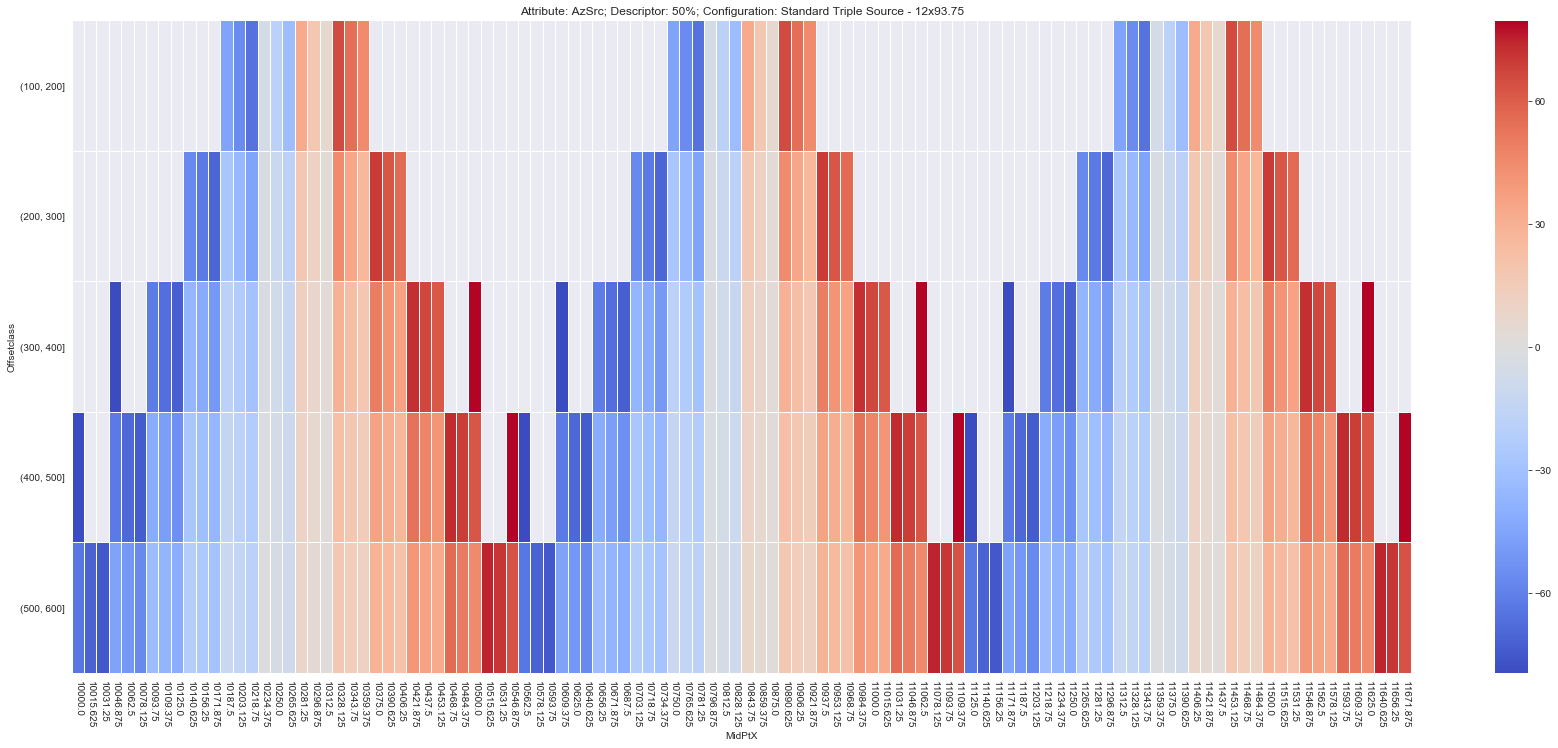

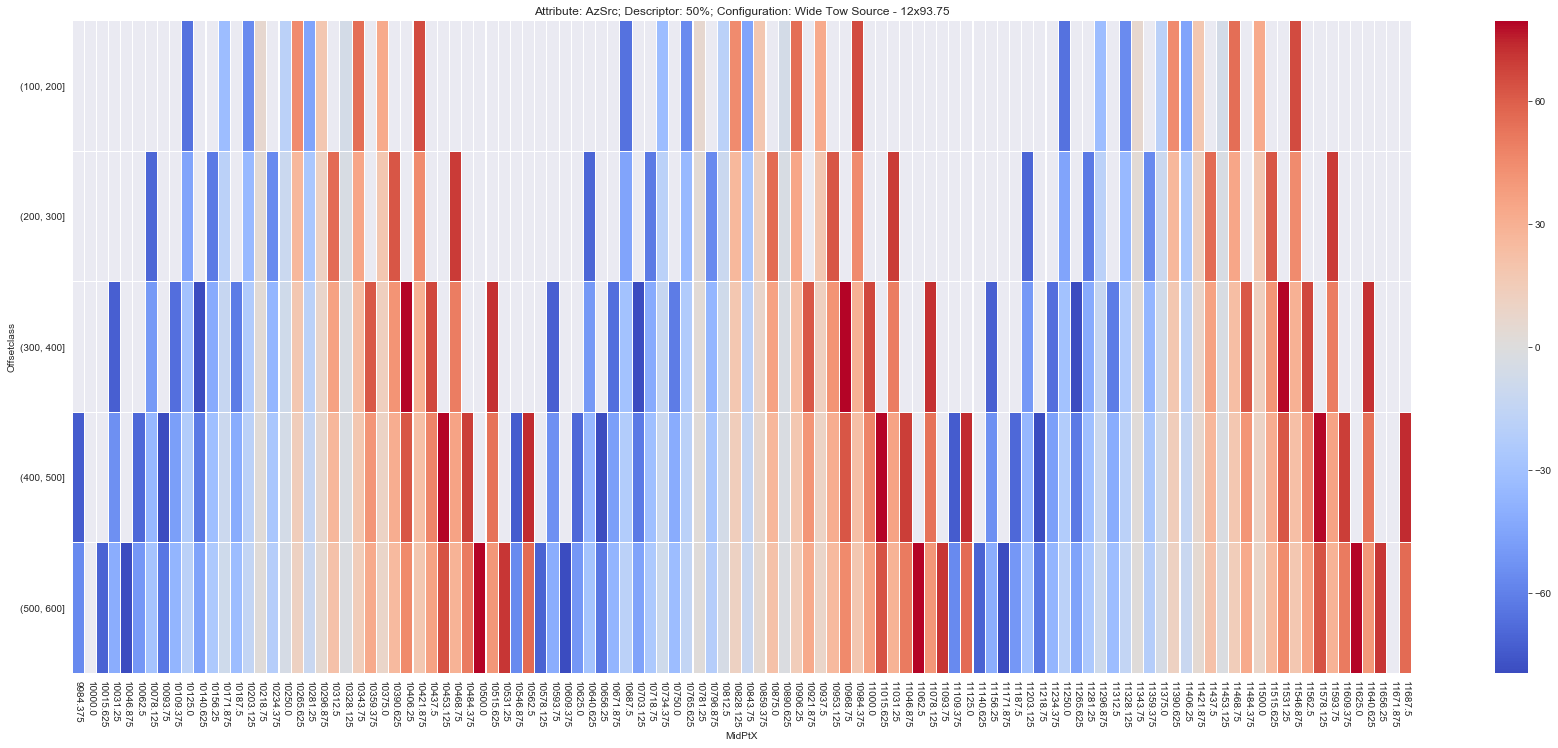

In [54]:
my_offset_data.plot_attrib(attrib='AzSrc', descriptor='50%', palette="coolwarm")

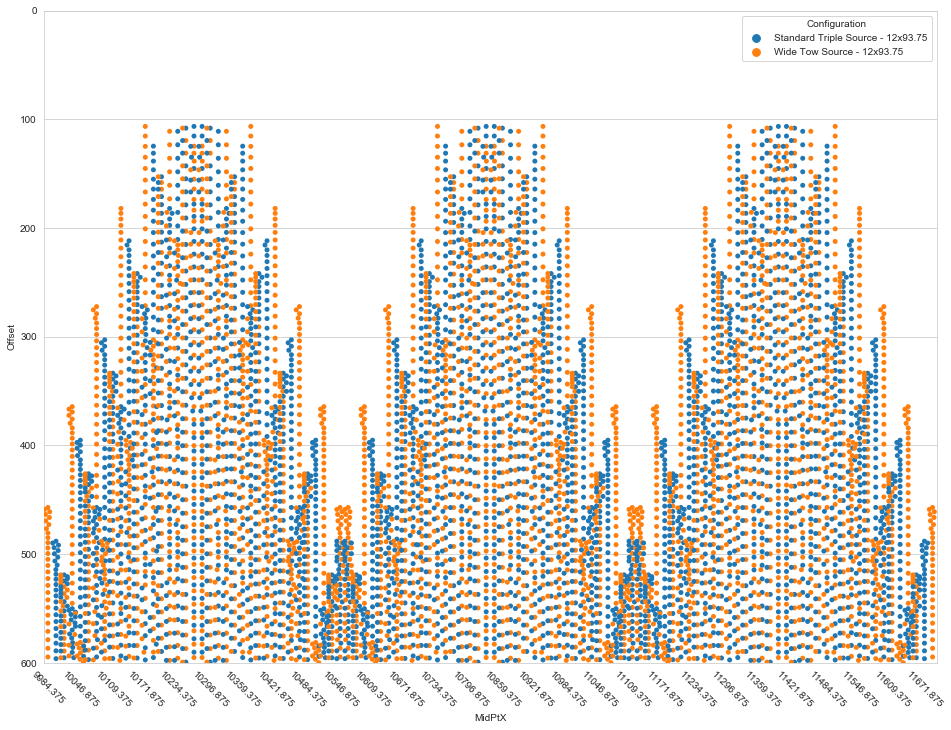

In [21]:
my_offset_data.plot_swarm()

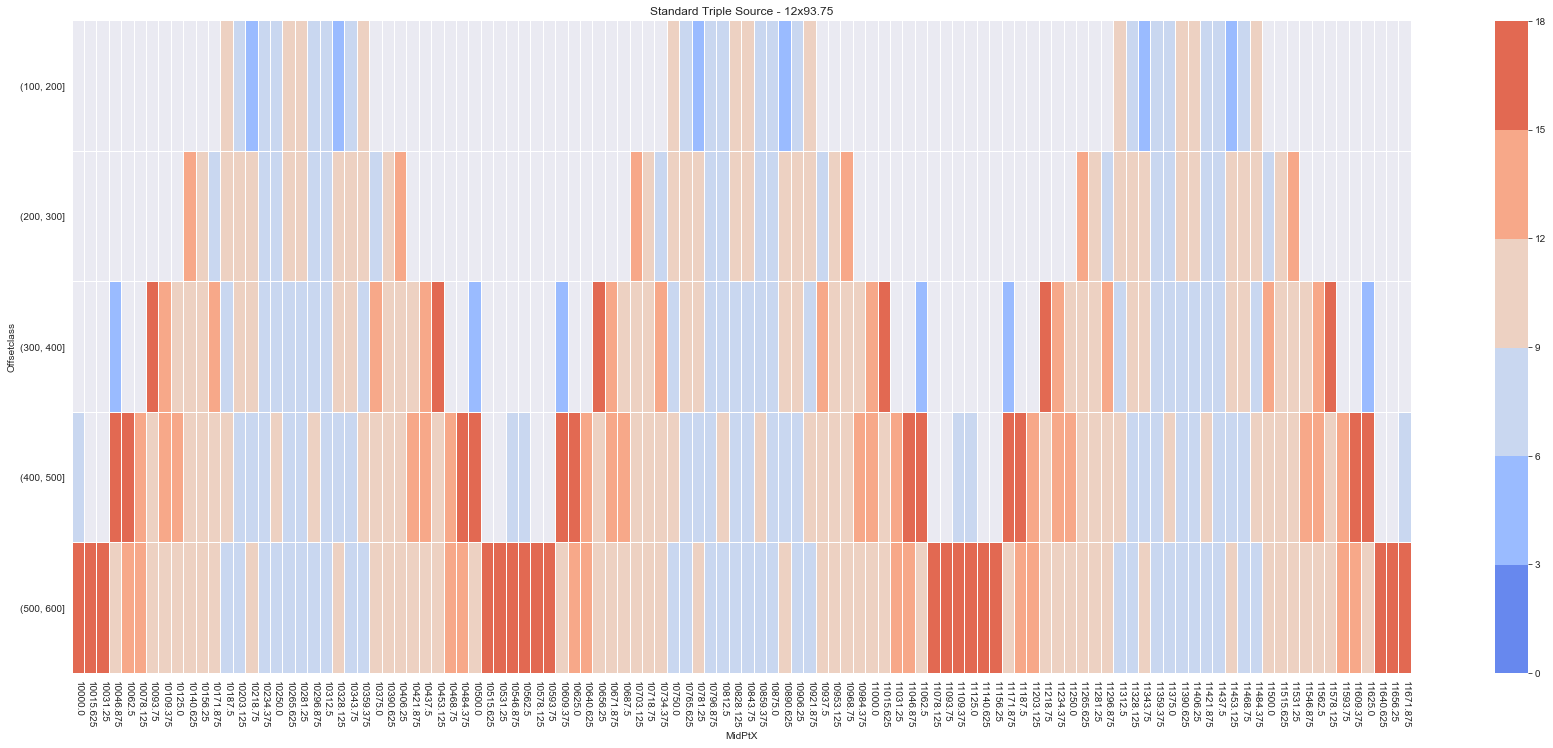

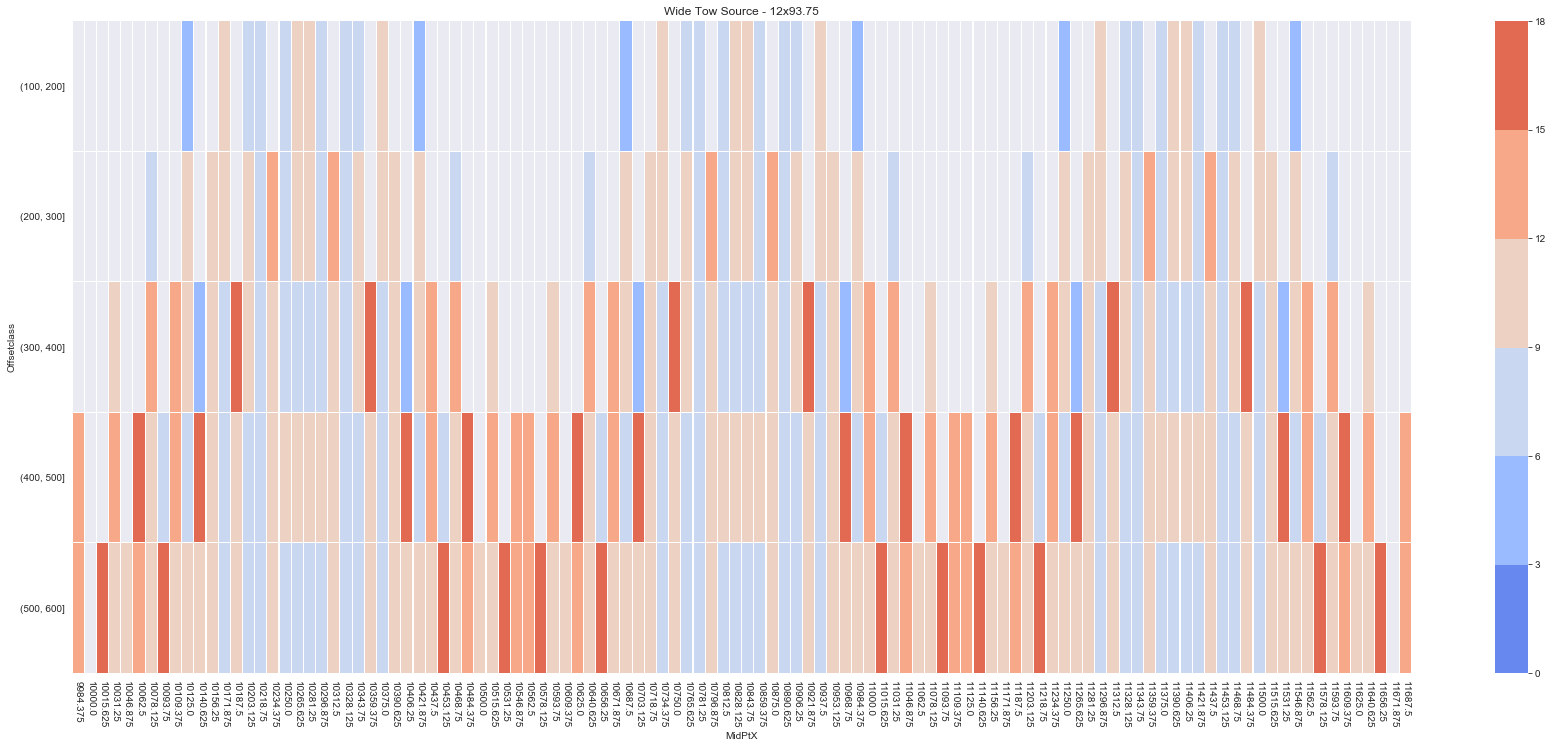

In [22]:
my_offset_data.plot_offset_bins(palette='coolwarm', maxfold=18)

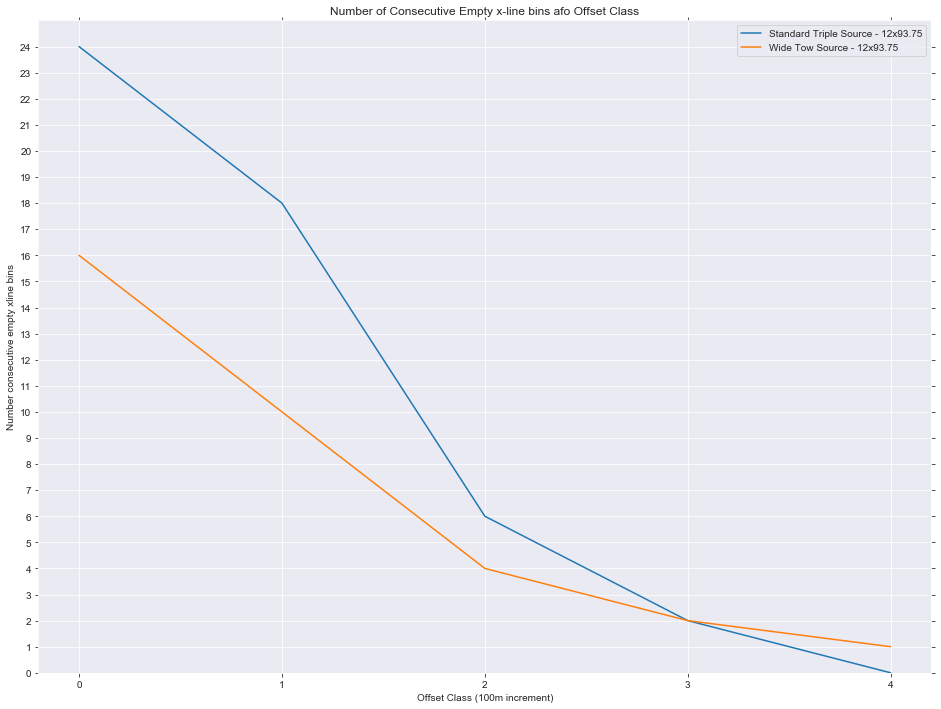

In [23]:
my_offset_data.plot_empty_bins(range=False)

In [24]:
my_offset_data.offset_planes

IntervalIndex([(100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [25]:
my_offset_data.offset_planes[1]

Interval(200, 300, closed='right')

In [26]:
#my_offset_data.df_attribs_stats[my_offset_data.df_attribs_stats['Offsetclass'] == my_offset_data.offset_planes[6]]

In [27]:
my_offset_data.df['MidPtX'].unique()

array([10546.875, 10500.   , 10453.125, 10406.25 , 10359.375, 10312.5  ,
       10265.625, 10218.75 , 10171.875, 10125.   , 10078.125, 10031.25 ,
       10531.25 , 10484.375, 10437.5  , 10390.625, 10343.75 , 10296.875,
       10250.   , 10203.125, 10156.25 , 10109.375, 10062.5  , 10015.625,
       10515.625, 10468.75 , 10421.875, 10375.   , 10328.125, 10281.25 ,
       10234.375, 10187.5  , 10140.625, 10093.75 , 10046.875, 10000.   ,
       11109.375, 11062.5  , 11015.625, 10968.75 , 10921.875, 10875.   ,
       10828.125, 10781.25 , 10734.375, 10687.5  , 10640.625, 10593.75 ,
       11093.75 , 11046.875, 11000.   , 10953.125, 10906.25 , 10859.375,
       10812.5  , 10765.625, 10718.75 , 10671.875, 10625.   , 10578.125,
       11078.125, 11031.25 , 10984.375, 10937.5  , 10890.625, 10843.75 ,
       10796.875, 10750.   , 10703.125, 10656.25 , 10609.375, 10562.5  ,
       11671.875, 11625.   , 11578.125, 11531.25 , 11484.375, 11437.5  ,
       11390.625, 11343.75 , 11296.875, 11250.   , 

In [28]:
def stat_for_offset_class(data, offsetplane, config, attrib, descriptor='50%', swarm=False):
    df_temp = data.df[data.df['Configuration'] == config]
    bins = df_temp['MidPtX'].unique()
    #print(bins, len(bins))
    #df_na = data.df[(data.df['Offsetclass'].isna())]
    #df_temp = data.df[(data.df['Offsetclass'] == data.offset_planes[offsetplane]) | (data.df['Offsetclass'].isna())]
    df_temp = df_temp[(df_temp['Offsetclass'] == data.offset_planes[offsetplane])]
    #df_temp = df_temp.append(df_na)
    
    bins_kept = df_temp['MidPtX'].unique()
    bins_to_add = set(bins).difference(set(bins_kept))
    #print(bins_kept, len(bins_kept))
    #print(bins_to_add, len(bins_to_add))
    dict_to_add = {}
    dict_to_add['MidPtX'] = sorted(list(bins_to_add))
    df_to_add = pd.DataFrame(dict_to_add)
    df_temp = df_temp.append(df_to_add, ignore_index=True, sort=True)
    
    df_temp_graph = data.df_attribs_stats[(data.df_attribs_stats['Attribute'] == attrib) & (data.df_attribs_stats['Offsetclass'] == data.offset_planes[offsetplane])]
    df_temp_graph = df_temp_graph[df_temp_graph['Configuration'] == config]
    bins_graph_kept = df_temp_graph['MidPtX'].unique()
    #print(bins_graph_kept, len(bins_graph_kept))
    #print(set(bins_graph_kept).issubset(set(bins_kept)))
    #print(set(bins_kept).issubset(set(bins_graph_kept)))
    df_temp_graph = df_temp_graph.append(df_to_add, ignore_index=True, sort=True).sort_values(['MidPtX']).reset_index()
    #print(df_temp.dtypes)
    #print(df_temp_graph.dtypes)
    #print(df_temp_graph[descriptor])
    
    plt.figure(figsize=(24, 12))
    sns.set_style('darkgrid')
    #sns.swarmplot(x='MidPtX', y='Ttime', data=my_offset_data.df[(my_offset_data.df['Offset'] <= 250) & (my_offset_data.df['Offset'] >= 150)], hue='Configuration')
    if swarm:
        sns.swarmplot(x='MidPtX', y=attrib, data=df_temp.reset_index(), hue='Configuration', hue_order=data.configurations)
    else:
        sns.boxplot(x='MidPtX', y=attrib, data=df_temp.reset_index(), hue='Configuration', hue_order=data.configurations)
    #sns.swarmplot(x='MidPtX', y=attrib, data=df_temp.reset_index(), hue='Configuration')
    #sns.swarmplot(x='MidPtX', y=attrib, data=df_temp, hue='Configuration')
    sns.lineplot(data=df_temp_graph[descriptor], color='grey', style='.')
    #sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph.reset_index(), hue='Configuration', hue_order=data.configurations)
    #sns.lineplot(x='MidPtX', y=attrib, data=df_temp.reset_index(), hue='Configuration', estimator='mean', err_style='band')
    #sns.lineplot(data=df_temp_graph.set_index('MidPtX')[descriptor])
    #plt.ylim(-180, 180)
    locs, labels = plt.xticks()
    plt.xticks(locs[::1], labels[::1], rotation=-90)
    plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]}")
    plt.show()
    
    
    #return df_temp, df_temp_graph


In [29]:
#my_offset_data.x_limit(lower=10000, upper=10500)

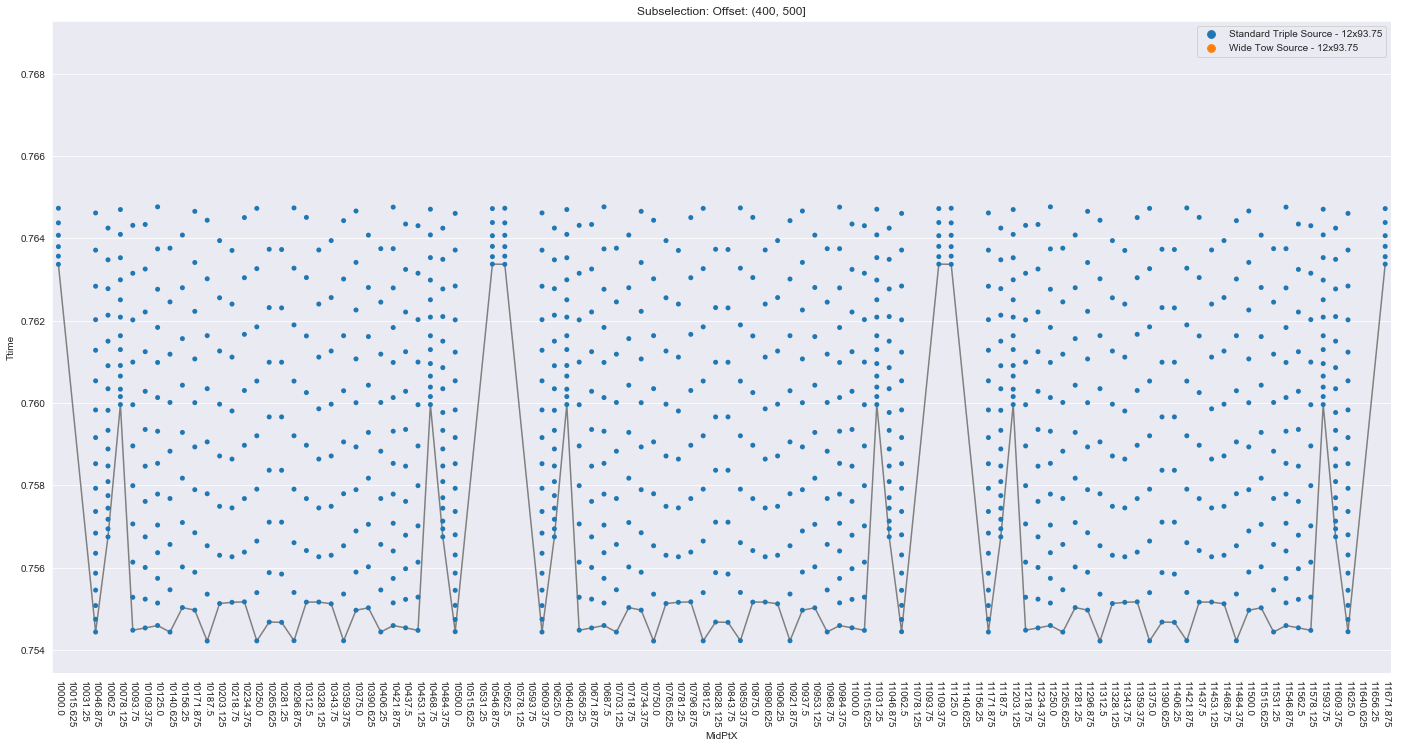

In [63]:
stat_for_offset_class(my_offset_data, 3, 'Standard Triple Source - 12x93.75', 'Ttime', descriptor='min', swarm=True)

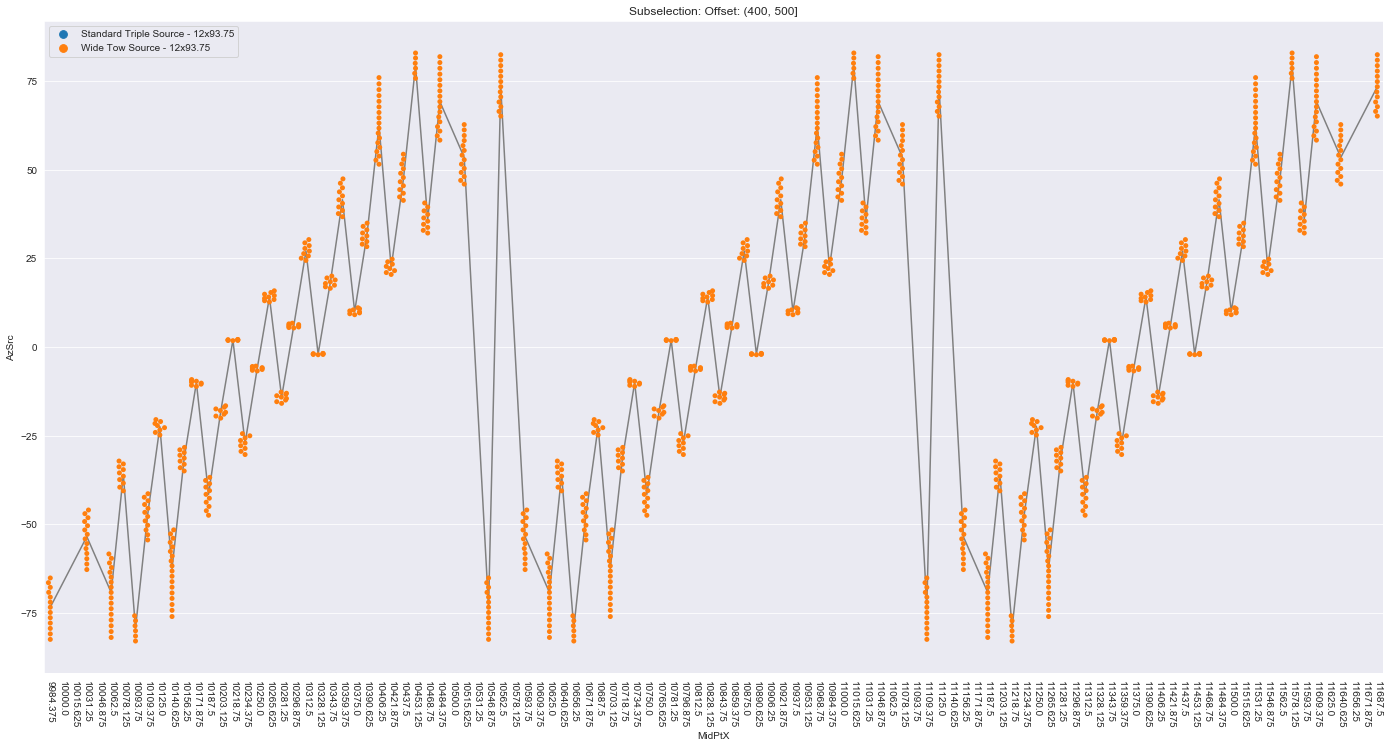

In [184]:
stat_for_offset_class(my_offset_data, 3, 'Wide Tow Source - 12x93.75', 'AzSrc', descriptor='50%', swarm=True)

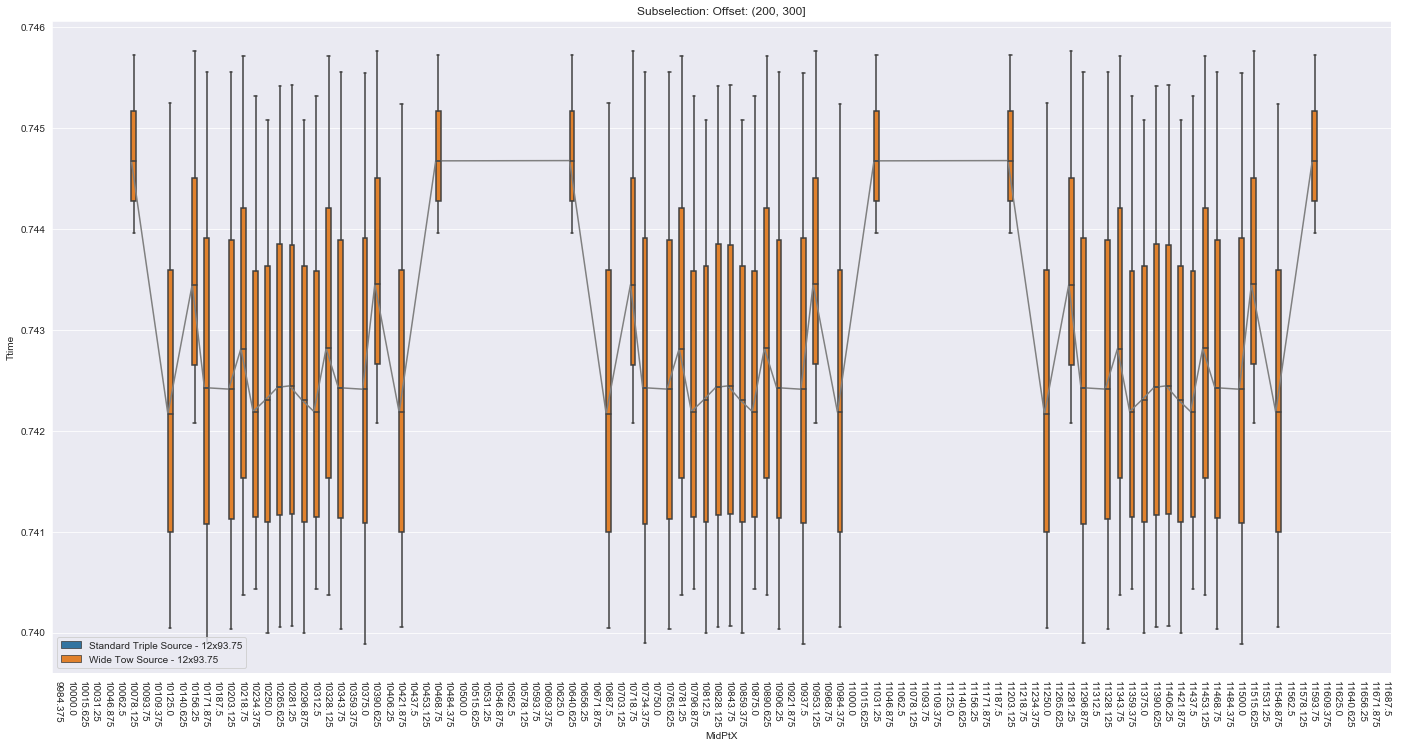

In [38]:
stat_for_offset_class(my_offset_data, 1, 'Wide Tow Source - 12x93.75', 'Ttime')

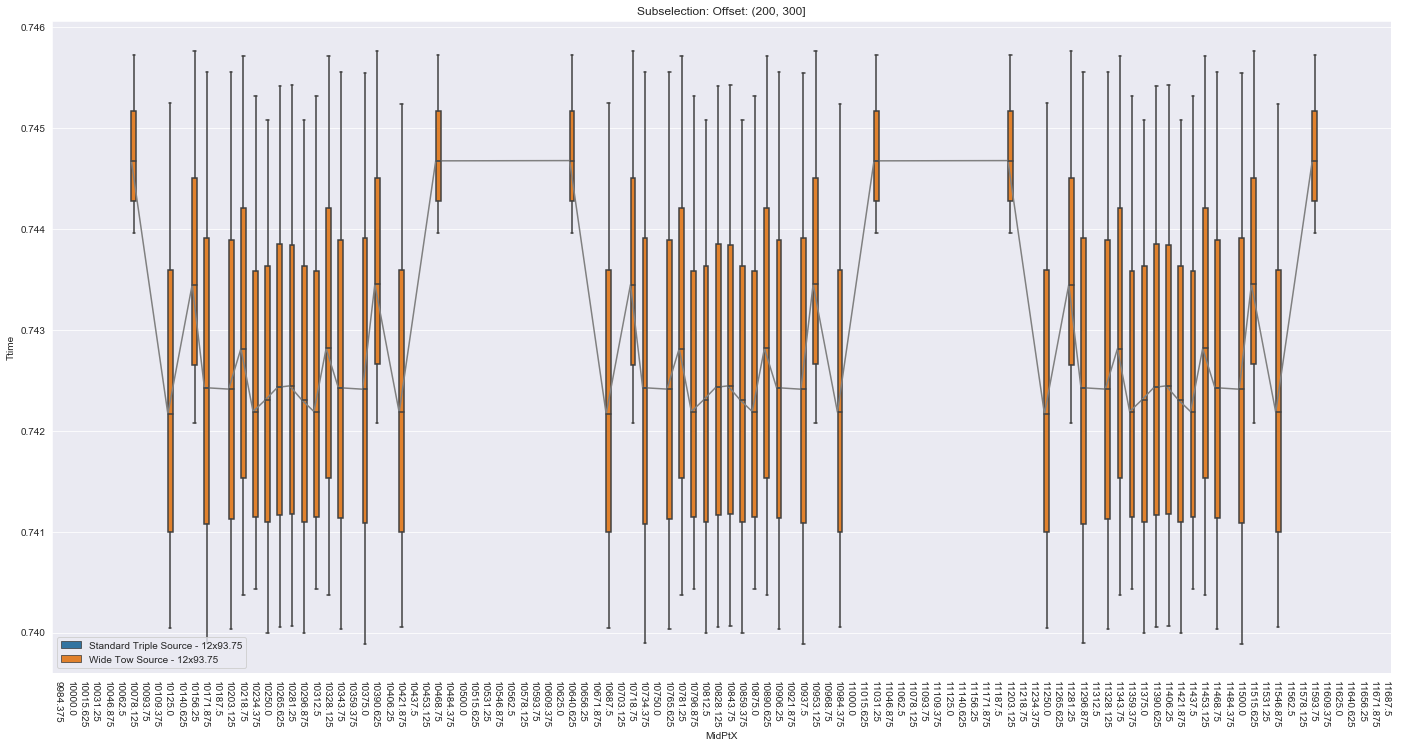

In [39]:
stat_for_offset_class(my_offset_data, 1, 'Wide Tow Source - 12x93.75', 'Ttime')

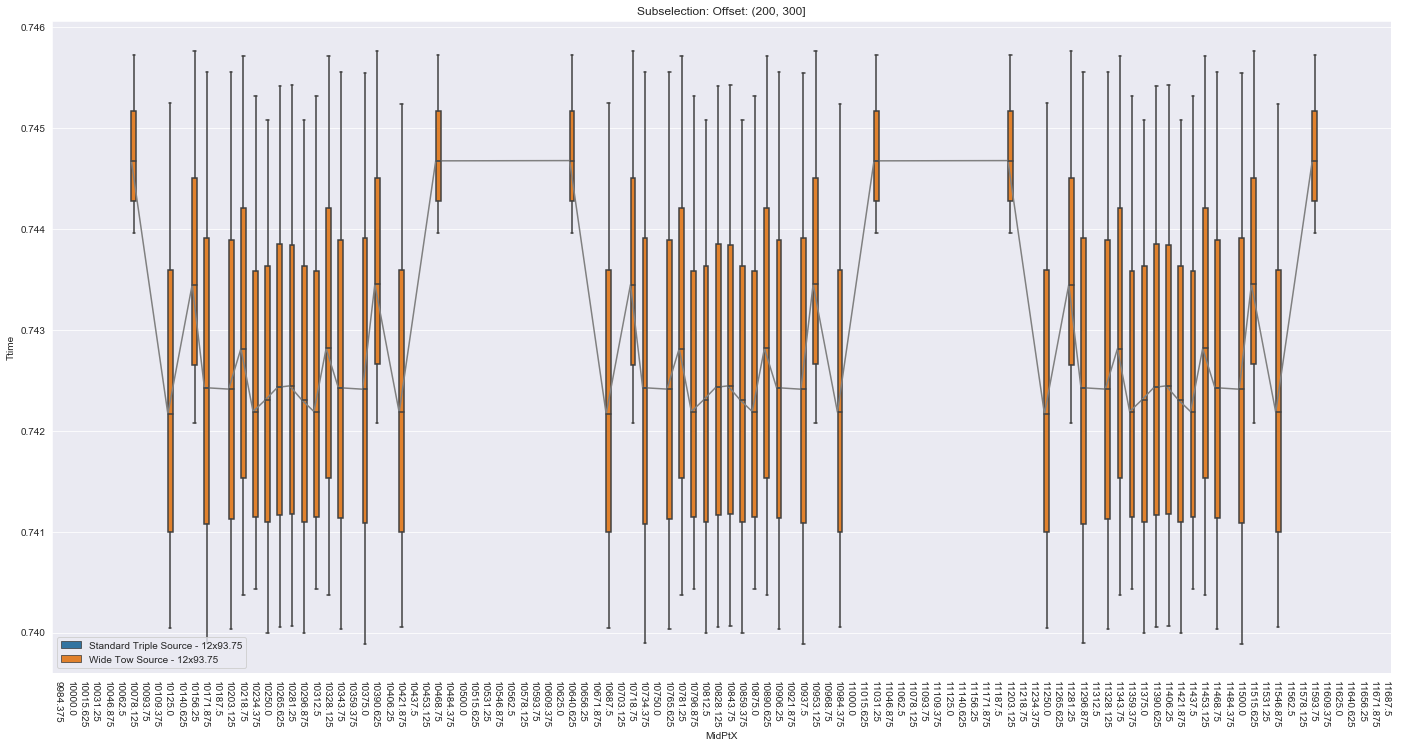

In [45]:
stat_for_offset_class(my_offset_data, 1, 'Wide Tow Source - 12x93.75', 'Ttime')

In [447]:
def stat_for_offset_class_comp(data, offsetplane, attrib, descriptor):
    df_temp_graph = data.df_attribs_stats[(data.df_attribs_stats['Attribute'] == attrib) & (data.df_attribs_stats['Offsetclass'] == data.offset_planes[offsetplane])]
    #df_temp_graph = df_temp_graph[df_temp_graph['Configuration'] == config]
    df_temp_graph = df_temp_graph.sort_values(['Configuration', 'MidPtX']).reset_index()
    df_diff = pd.DataFrame()
    for config in data.configurations:
        df_diff_temp = df_temp_graph[df_temp_graph['Configuration'] == config][[descriptor]]
        df_diff_temp = df_diff_temp.diff().apply(np.abs)
        df_diff_temp.columns = [descriptor + ' AbsDiff']
        #df_diff_temp.append(df_diff)
        df_diff = df_diff.append(df_diff_temp)
        #print(df_diff_temp.head())
    #df_diff.columns = ['Diff']
    #print(data.configurations)
    #df_temp_graph = df_temp_graph['50%'].diff(periods=1)
    #print(df_diff.head())
    #print(df_diff.tail())
    #print(df_diff)
    df_temp_graph = pd.concat([df_temp_graph, df_diff],axis=1)
    #print(df_temp_graph.head())
    #print(df_temp_graph.tail())
    plt.figure(figsize=(24, 12))
    sns.set_style('darkgrid')
    ##sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    #sns.lineplot(x='MidPtX', y=descriptor + ' AbsDiff', data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    testtuple = (0, 0.01, 0.0002)
    histbins = list(np.arange(*testtuple))
    print(histbins)
    sns.distplot(df_temp_graph[df_temp_graph['Configuration'] == 'Standard Triple Source - 12x93.75']['50% AbsDiff'].dropna(), bins = histbins, kde=False, rug=True, label='Standard Triple Source - 12x93.75')
    #sns.distplot(df_temp_graph[df_temp_graph['Configuration'] == 'Wide Tow Source - 12x93.75']['50% AbsDiff'].dropna(), bins = list(range(0, 180, 5)), kde=False, rug=True, label='Wide Tow Source - 12x93.75')
    #plt.legend()

    plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]} for attribute: {attrib}")
    plt.show()

[0.0, 0.0002, 0.0004, 0.0006000000000000001, 0.0008, 0.001, 0.0012000000000000001, 0.0014, 0.0016, 0.0018000000000000002, 0.002, 0.0022, 0.0024000000000000002, 0.0026000000000000003, 0.0028, 0.003, 0.0032, 0.0034000000000000002, 0.0036000000000000003, 0.0038, 0.004, 0.004200000000000001, 0.0044, 0.0046, 0.0048000000000000004, 0.005, 0.005200000000000001, 0.0054, 0.0056, 0.0058000000000000005, 0.006, 0.006200000000000001, 0.0064, 0.0066, 0.0068000000000000005, 0.007, 0.007200000000000001, 0.0074, 0.0076, 0.0078000000000000005, 0.008, 0.0082, 0.008400000000000001, 0.0086, 0.0088, 0.009000000000000001, 0.0092, 0.0094, 0.009600000000000001, 0.0098]


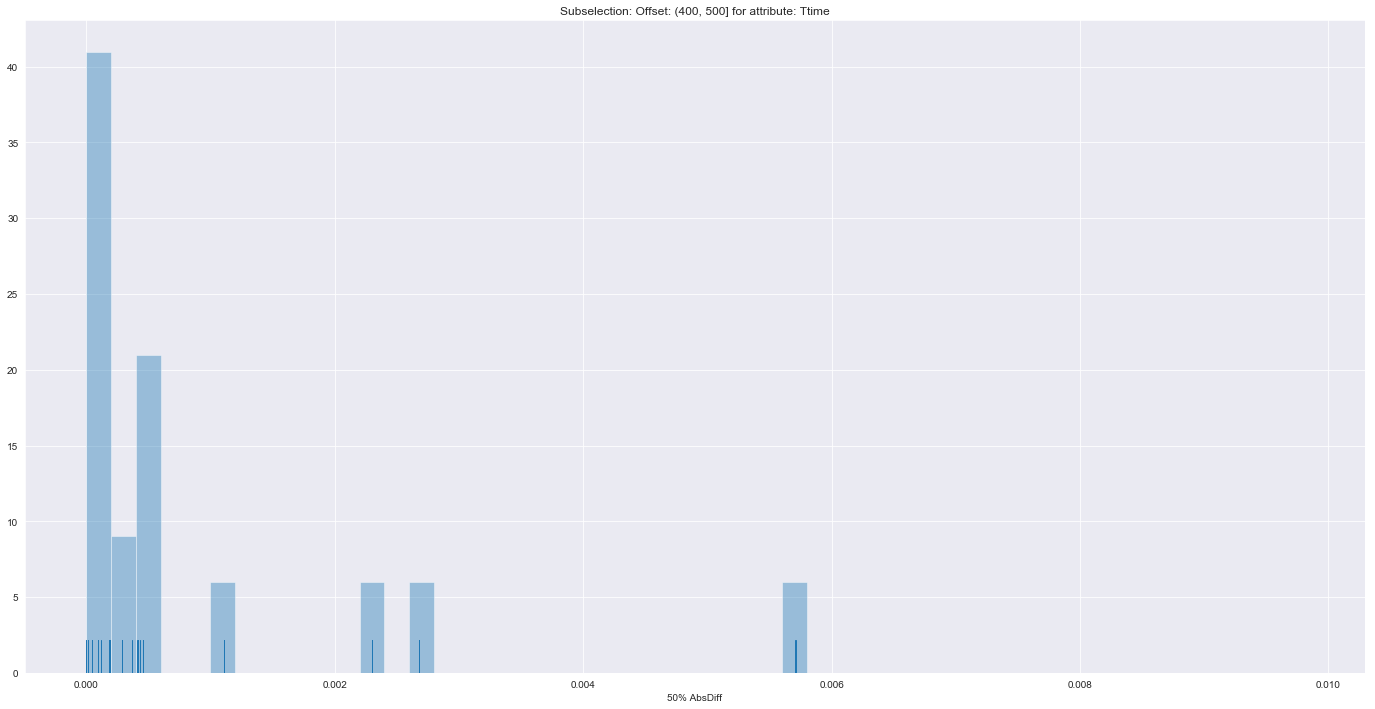

In [448]:
stat_for_offset_class_comp(my_offset_data, 3, 'Ttime', '50%')

In [308]:
test_df = my_offset_data.df

In [412]:
bin_list = list(range(0, 190, 10))

In [413]:
bin_list

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180]

In [316]:
my_offset_data.offset_planes[2]

Interval(300, 400, closed='right')

In [318]:
test_df[(test_df['MidPtX'] == 10312.5) & (test_df['Offsetclass'] == my_offset_data.offset_planes[3])][['AzSrc']]

,AzSrc
201,2.136669
202,2.111270
203,2.053527
204,1.998033
205,1.936388
206,1.890623
207,1.844859
208,1.799094
4703,30.307135
4704,29.390440


In [351]:
my_offset_data.configurations[0]

'Standard Triple Source - 12x93.75'

In [371]:
def plot_hist(data, offsetplane, attrib):
    data_for_offsetplane = data.df[data.df['Offsetclass'] ==  data.offset_planes[offsetplane]]
    plt.figure(figsize=(24, 12))
    sns.set_style('darkgrid')
    #sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    temp = pd.DataFrame()
    temp1 = data_for_offsetplane[data_for_offsetplane['Configuration'] == data.configurations[0]][[attrib]]
    temp2 = data_for_offsetplane[data_for_offsetplane['Configuration'] == data.configurations[1]][[attrib]]
    #print(temp.head())
    #print(temp.tail())
    plt.hist(temp1, label = data.configurations[0], bins=20)
    #sns.distplot(temp2, hist=False, label = data.configurations[1], bins=100)
    #plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]} for attribute: {attrib}")
    plt.show()

/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


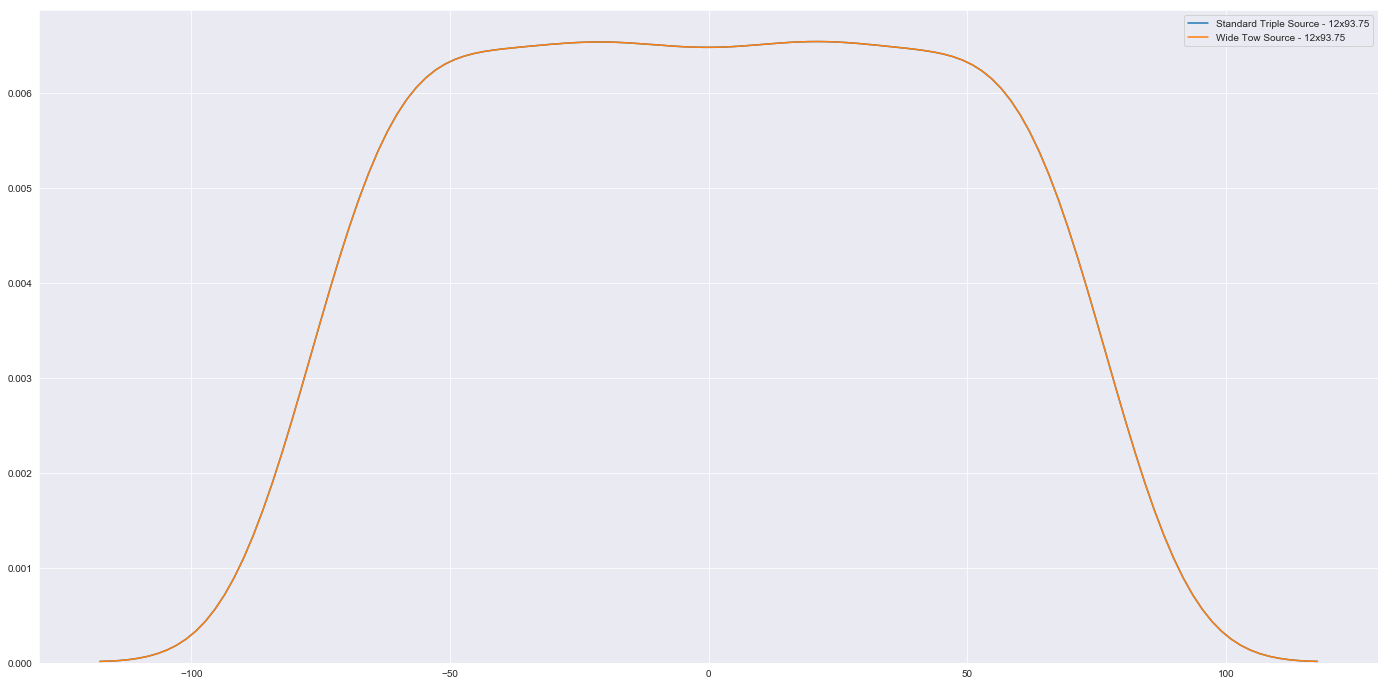

In [362]:
plot_hist(my_offset_data, 1, 'AzSrc')

In [36]:
test = test[test['Configuration'] == 'Wide Tow Source - Equinor - 12x75']
graph_test = graph_test[graph_test['Configuration'] == 'Wide Tow Source - Equinor - 12x75']

NameError: name 'test' is not defined

In [ ]:
print(np.sort(test['MidPtX'].unique()))

In [ ]:
print(np.sort(graph_test['MidPtX'].unique()))

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [65]:
from geotools.input_tools import make_df_from_columndata

In [66]:
path

'./testfiles/nearoffset_dist/Eq_Arg/'

In [79]:
footprint_conv = make_df_from_columndata(path + '12x93,75mx6000m_4-500m.A1X')

Test_easyvesselsketch.ipynb     Untitled.ipynb
Test_offset_dist-eq_arg.ipynb   geotools/
Test_offset_dist.ipynb          my_script.py
Test_offset_distribution.ipynb  offset_dist_test.py
Test_script_4D_tools.ipynb      testfiles/


In [80]:
footprint_wide = make_df_from_columndata(path + '12x93mx8000m_WT250_4-500m.A1X')

In [82]:
footprint_conv

,Trace,PickedTime,PickedValue,PickedRelAmplitude,PickedAbsAmplitude,CDP-X,CDP-Y
numRows,,,,,,,
0,1.0,761.4375,-0.029138,1.904613,-30.710920,10000.0,8601.5625
1,2.0,761.6250,-0.027428,1.379270,-31.236265,10000.0,8617.1875
2,3.0,762.0625,-0.025643,0.794861,-31.820673,10000.0,8632.8125
3,4.0,762.3750,-0.024831,0.515547,-32.099987,10000.0,8648.4375
4,5.0,762.5000,-0.023801,0.147406,-32.468128,10000.0,8664.0625
...,...,...,...,...,...,...,...
175,176.0,762.5000,-0.024359,0.348857,-32.266678,10000.0,11335.9375
176,177.0,762.3750,-0.025135,0.621191,-31.994345,10000.0,11351.5625
177,178.0,762.0625,-0.025876,0.873431,-31.742104,10000.0,11367.1875


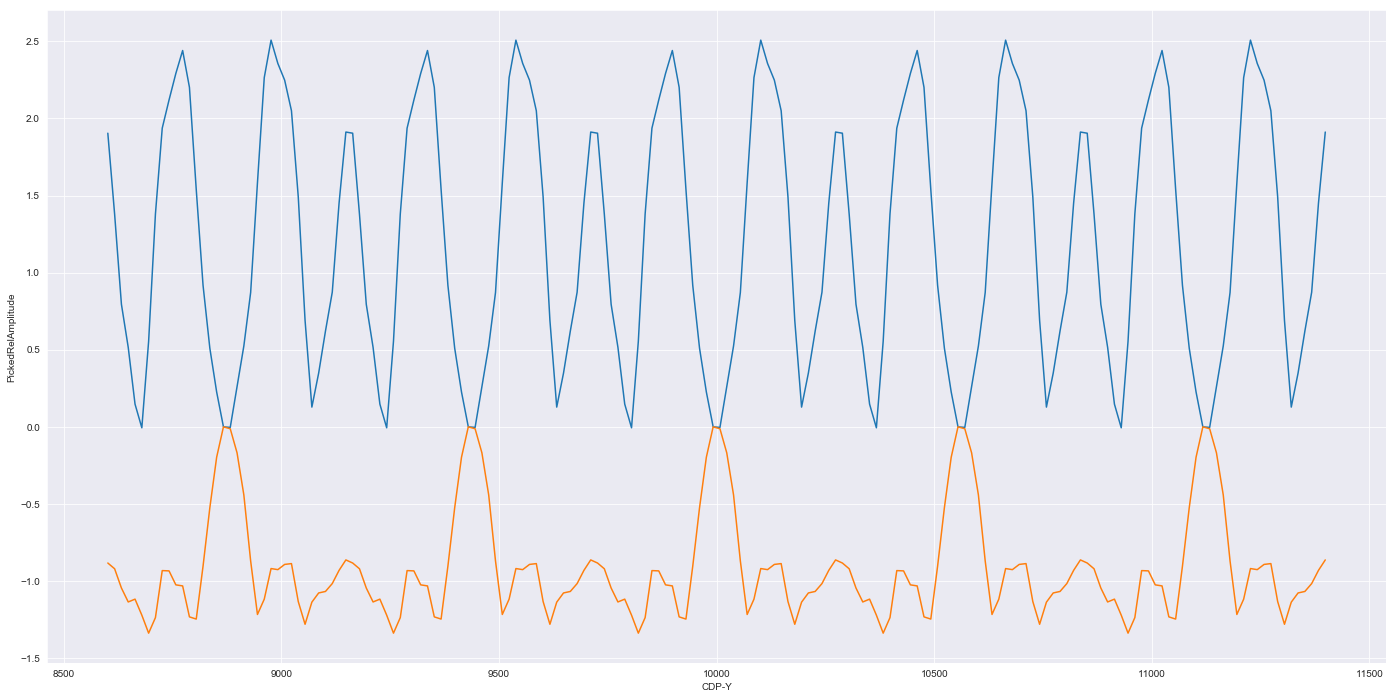

In [88]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', data=footprint_conv)
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', data=footprint_wide)
plt.show()

In [89]:
footprint_conv['Configuration'] = 'Conventional Sources'
footprint_wide['Configuration'] = 'Wide Sources'

In [124]:
footprint = footprint_conv.append(footprint_wide).reset_index()

In [125]:
footprint

,numRows,Trace,PickedTime,PickedValue,PickedRelAmplitude,PickedAbsAmplitude,CDP-X,CDP-Y,Configuration
0,0,1.0,761.4375,-0.029138,1.904613,-30.710920,10000.0,8601.5625,Conventional Sources
1,1,2.0,761.6250,-0.027428,1.379270,-31.236265,10000.0,8617.1875,Conventional Sources
2,2,3.0,762.0625,-0.025643,0.794861,-31.820673,10000.0,8632.8125,Conventional Sources
3,3,4.0,762.3750,-0.024831,0.515547,-32.099987,10000.0,8648.4375,Conventional Sources
4,4,5.0,762.5000,-0.023801,0.147406,-32.468128,10000.0,8664.0625,Conventional Sources
...,...,...,...,...,...,...,...,...,...
355,175,176.0,762.3750,-0.025310,-1.077366,-31.934280,10000.0,11335.9375,Wide Sources
356,176,177.0,762.5000,-0.025338,-1.067622,-31.924536,10000.0,11351.5625,Wide Sources
357,177,178.0,762.5000,-0.025487,-1.016546,-31.873461,10000.0,11367.1875,Wide Sources
358,178,179.0,762.3750,-0.025740,-0.930801,-31.787714,10000.0,11382.8125,Wide Sources


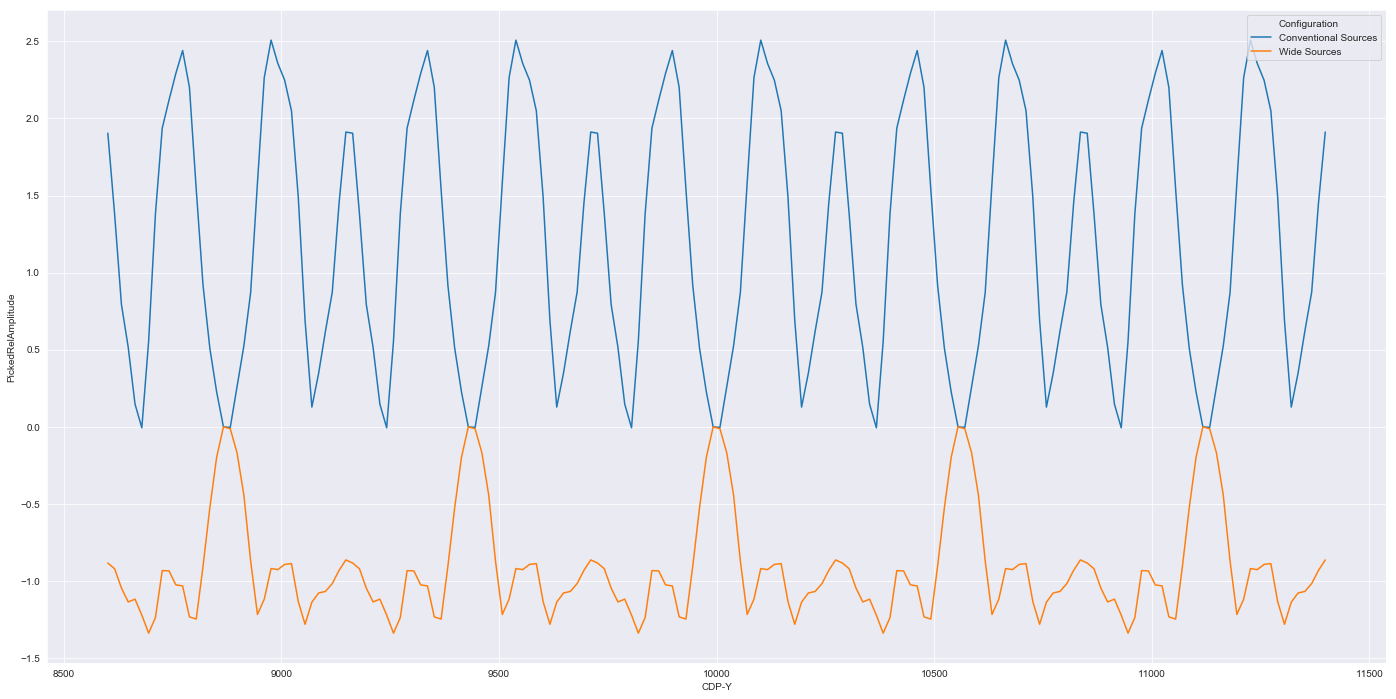

In [126]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', hue='Configuration', data=footprint)
plt.show()

In [127]:
footprint = footprint.rename(columns={'CDP-X': 'MidPtY', 'CDP-Y': 'MidPtX'})

In [128]:
footprint

,numRows,Trace,PickedTime,PickedValue,PickedRelAmplitude,PickedAbsAmplitude,MidPtY,MidPtX,Configuration
0,0,1.0,761.4375,-0.029138,1.904613,-30.710920,10000.0,8601.5625,Conventional Sources
1,1,2.0,761.6250,-0.027428,1.379270,-31.236265,10000.0,8617.1875,Conventional Sources
2,2,3.0,762.0625,-0.025643,0.794861,-31.820673,10000.0,8632.8125,Conventional Sources
3,3,4.0,762.3750,-0.024831,0.515547,-32.099987,10000.0,8648.4375,Conventional Sources
4,4,5.0,762.5000,-0.023801,0.147406,-32.468128,10000.0,8664.0625,Conventional Sources
...,...,...,...,...,...,...,...,...,...
355,175,176.0,762.3750,-0.025310,-1.077366,-31.934280,10000.0,11335.9375,Wide Sources
356,176,177.0,762.5000,-0.025338,-1.067622,-31.924536,10000.0,11351.5625,Wide Sources
357,177,178.0,762.5000,-0.025487,-1.016546,-31.873461,10000.0,11367.1875,Wide Sources
358,178,179.0,762.3750,-0.025740,-0.930801,-31.787714,10000.0,11382.8125,Wide Sources


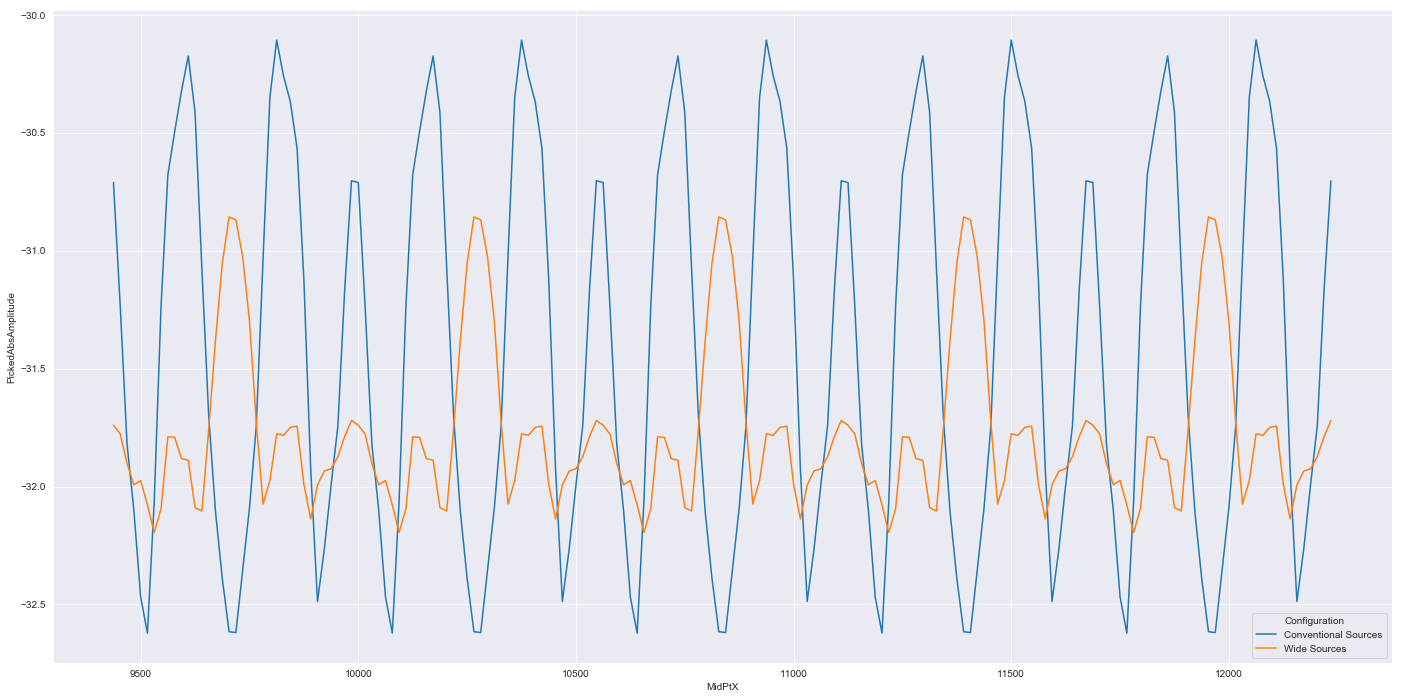

In [146]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='MidPtX', y='PickedAbsAmplitude', hue='Configuration', data=footprint)
plt.show()

In [130]:
footprint['MidPtX'] = footprint['MidPtX'] + 835.9375

In [155]:
footprint['style'] = 'Style'

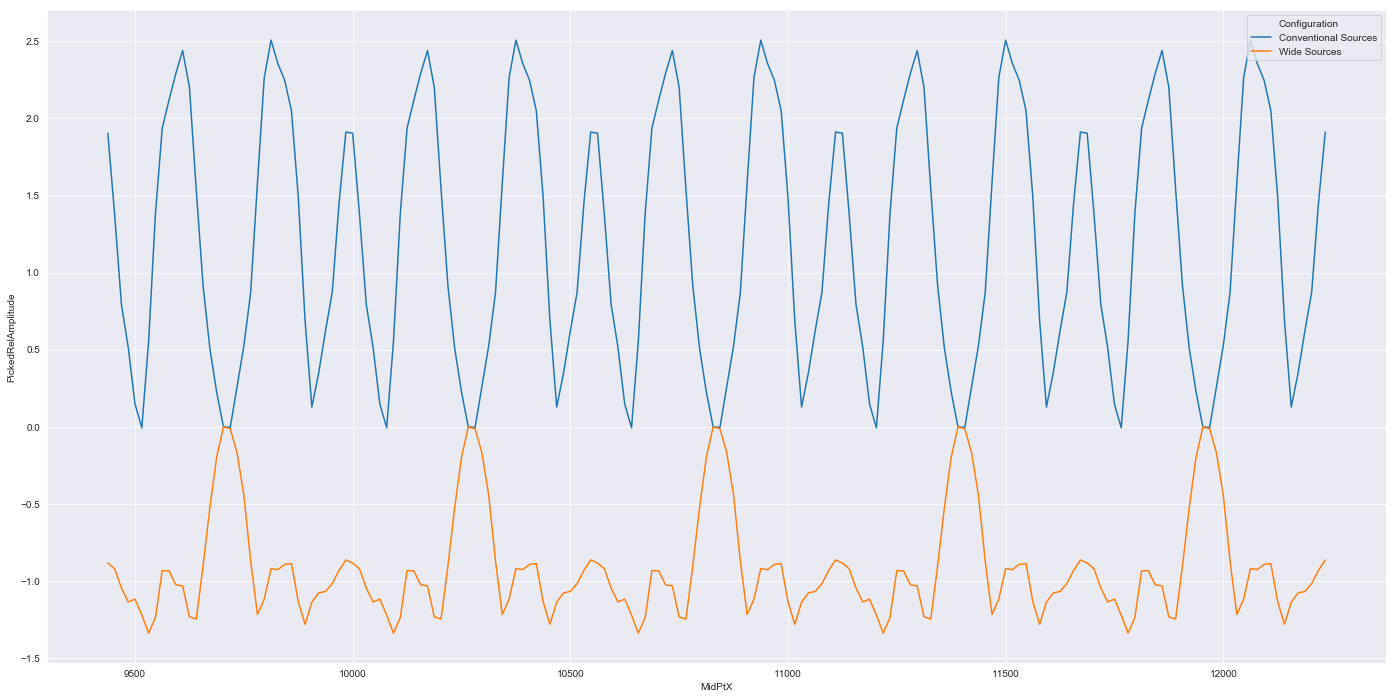

In [131]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='MidPtX', y='PickedRelAmplitude', hue='Configuration', data=footprint)
plt.show()

In [180]:
def stat_for_offset_class_comp_comb(data, footprint, offsetplane, attrib, descriptor):
    df_temp_graph = data.df_attribs_stats[(data.df_attribs_stats['Attribute'] == attrib) & (data.df_attribs_stats['Offsetclass'] == data.offset_planes[offsetplane])]
    #df_temp_graph = df_temp_graph[df_temp_graph['Configuration'] == config]
    #df_temp_graph['Style'] = 'style1'
    temp_footprint = footprint.copy(deep=True)
    temp_footprint['PickedRelAmplitude'] = temp_footprint['PickedRelAmplitude'] *40
    #temp_footprint['Style'] = 'style2'
    #joined = df_temp_graph.join(temp_footprint, on='MidPtX', how='outer', suffix='sfdfs')
    plt.figure(figsize=(24, 12))
    plt.xlim(10000, 11500)
    sns.set_style('darkgrid')
    sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    sns.lineplot(x='MidPtX', y='PickedRelAmplitude', hue='Configuration', data=temp_footprint)
    plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]} for attribute: {attrib}")
    plt.show()

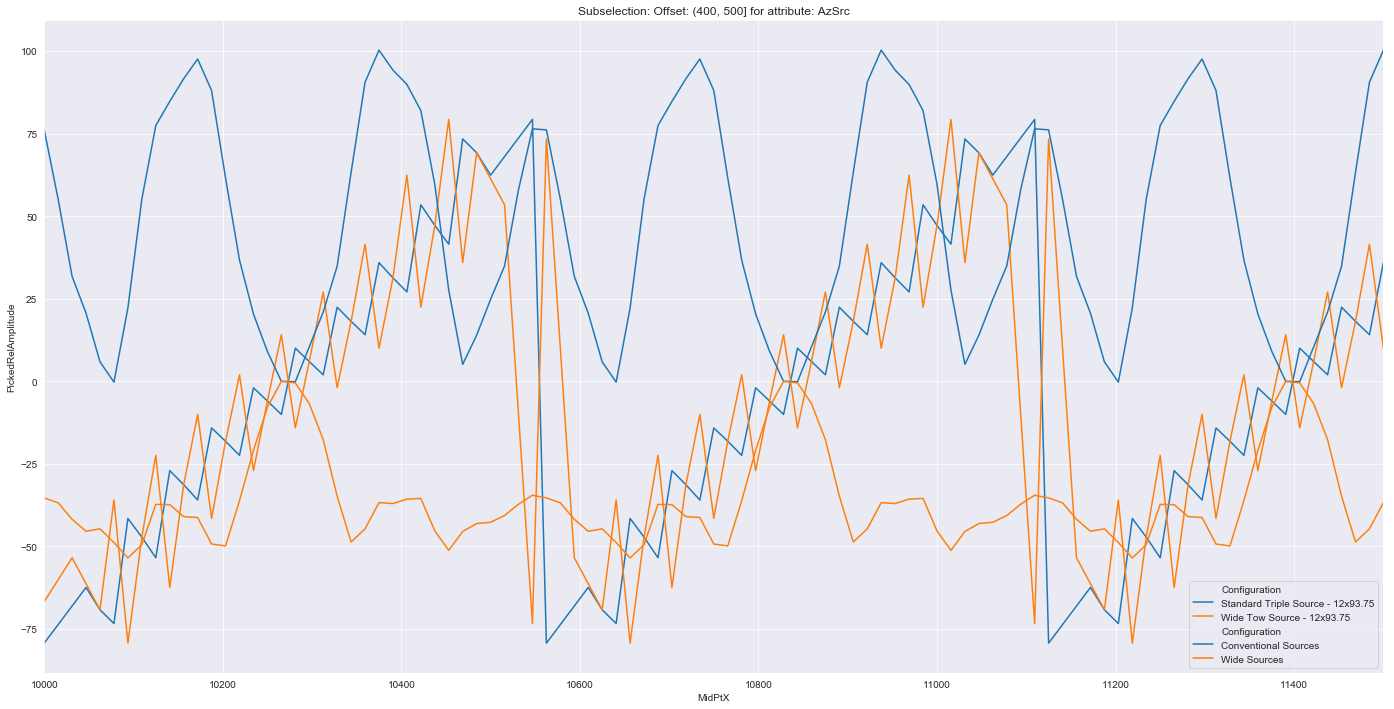

In [449]:
stat_for_offset_class_comp_comb(my_offset_data, footprint, 3, 'AzSrc', '50%')

In [121]:
footprint['style']

,numRows,Trace,PickedTime,PickedValue,PickedRelAmplitude,PickedAbsAmplitude,MidPtY,MidPtX,Configuration
0,0,1.0,761.4375,-0.029138,17141.520362,-30.710920,10000.0,9437.500,Conventional Sources
1,1,2.0,761.6250,-0.027428,12413.431406,-31.236265,10000.0,9453.125,Conventional Sources
2,2,3.0,762.0625,-0.025643,7153.752336,-31.820673,10000.0,9468.750,Conventional Sources
3,3,4.0,762.3750,-0.024831,4639.919312,-32.099987,10000.0,9484.375,Conventional Sources
4,4,5.0,762.5000,-0.023801,1326.655661,-32.468128,10000.0,9500.000,Conventional Sources
...,...,...,...,...,...,...,...,...,...
355,175,176.0,762.3750,-0.025310,-9696.293838,-31.934280,10000.0,12171.875,Wide Sources
356,176,177.0,762.5000,-0.025338,-9608.596961,-31.924536,10000.0,12187.500,Wide Sources
357,177,178.0,762.5000,-0.025487,-9148.909999,-31.873461,10000.0,12203.125,Wide Sources
358,178,179.0,762.3750,-0.025740,-8377.205223,-31.787714,10000.0,12218.750,Wide Sources
